In [63]:
# importing liabraries for analysis
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# setting pandas safe option
pd.set_option('mode.copy_on_write', True)

# Load the dataset from a CSV file
sauna_2025 = pd.read_csv("Anonymised Community Sauna Annual 2024 Survey (Responses).csv")
print("Shape: ",sauna_2025.shape)

Shape:  (1799, 35)


# Cleaning

In [64]:
# checking for missing values
sauna_2025.isnull().sum()

Timestamp                                                                                                                                        0
What is your age group?                                                                                                                          1
What gender do you identify with?                                                                                                                6
How would you describe your ethnicity?                                                                                                           5
Do you consider yourself to have a disability or long term health condition?                                                                    11
What is your sexual orientation?                                                                                                                 4
Please indicate the following about your employment status:                                                           

In [65]:
# dropping columns for anonymity and irrelevance to analysis

drop_list = [
    """ID""",
    """Timestamp""", 
    """What is your name?""", 
    """What is your sexual orientation?""",
    """Overall, how satisfied are you with your life nowadays? (where 0 is “not at all” and 10 is “completely”)""",
    """Overall, to what extent do you feel that the things you do in your life are worthwhile? (where 0 is “not at all” and 10 is “completely”)""",
    """I’ve been feeling optimistic about the future""",
    """I’ve been feeling useful""",
    """I’ve been feeling relaxed""",
    """I’ve been dealing with problems well""",
    """I’ve been thinking clearly""",
    """I’ve been feeling close to other people""",
    """I’ve been able to make up my own mind about things""",
]


sauna_2025 = sauna_2025.drop(columns=drop_list, errors="ignore")
df = sauna_2025.drop(columns=sauna_2025.columns[-1], errors="ignore")

In [67]:
# renaming columns for quick reference
rename_map = {
    """What is your age group?""": "age",
    """What gender do you identify with?""": "gender",
    """How would you describe your ethnicity?""": "ethnicity",
    """Do you consider yourself to have a disability or long term health condition?""": "disability_health_condition",
    """Please indicate the following about your employment status:""": "employment_status",
    """What is your religious belief?""": "religious_belief",
    """How would you describe your sexual orientation?""": "sexual_orientation",
    """Where do you currently live?""": "location",
    """Had you been to a sauna before visiting our community sauna?""": "previous_sauna_experience",
    """How did you first hear about our community sauna?""": "sauna_discovery_channel",
    """How often do you visit our sauna?""": "visit_frequency",
    """Which of our sauna locations do you visit most often?""": "location_frequency",
    """Have you experienced any physical health improvements from using the sauna?""": "physical_health_improvements",
    """Have you experienced any mental health improvements from using the sauna?""": "mental_health_improvements",
    """How important is having regular access to sauna? (On a scale of 1 to 5, where 1 is low and 5 is high)""": "sauna_access_importance",
    """What do you enjoy most about the community sauna?""": "enjoyment_reasons",
    """Do you feel a sense of belonging or community when using the sauna? On a scale of 1 to 5, where 1 is low and 5 is high""": "belonging_rating",
    """Please share why community sauna is important to you?""": "importance_reason",
}



df = df.rename(columns=rename_map)

df

,age,gender,ethnicity,disability_health_condition,employment_status,religious_belief,location,Had you been to a sauna before you came to Community Sauna?,How did you hear about the Community Sauna?,visit_frequency,...,"How would you rate the overall ambiance and atmosphere of the sauna?\r\n\r\nOn a scale of 1 to 5, where 1 is low and 5 is high","Are the sauna prices reasonable and in line with your expectations?\r\n\r\nOn a scale of 1 to 5, where 1 is low and 5 is high",What improvements or additions would you like to see in the sauna facilities or services?,"Do you know of any specific location where we could set up a community sauna? (e.g., a park, unused building, or local space)","What improvements would you suggest for the facilities, services, or events?",Are you familiar with our social prescribing offers and services?,"If yes, how did you hear about it?",importance_reason,In which area of London would you like us to set up a sauna?,What topics would you like to hear more about from us in our communications? (Select all that apply)
0,25–34,Female,"White (e.g., British, Irish, other European ba...",Yes,Employed,Judaism,Central London,Once or twice,Word of mouth,Monthly,...,5.0,5.0,NaN,NaN,NaN,Yes,Social Media,NaN,Central London,"Sauna health benefits, Not-for-profit work"
1,18–24,Male,"White (e.g., British, Irish, other European ba...",No,Employed,Atheism,South East London,Once or twice,Word of mouth,Rarely,...,5.0,5.0,NaN,NaN,NaN,Yes,Social Media,NaN,South East London,NaN
2,35–44,Male,"Asian or Asian British (e.g., Indian, Pakistan...",No,Employed,Agnosticism,South East London,I was already a regular sauna user,Word of mouth,Weekly,...,4.0,4.0,NaN,NaN,NaN,No,NaN,NaN,North East London,"Behind the scenes, Upcoming events"
3,25–34,Non-binary,"Mixed or multiple ethnic groups (e.g., White a...",No,Employed,Atheism,East London,Once or twice,Word of mouth,Rarely,...,4.0,4.0,NaN,NaN,NaN,Yes,Social Media,NaN,Central London,"Sauna etiquette or best practices, Not-for-pro..."
4,45–54,Female,"White (e.g., British, Irish, other European ba...",No,Employed,Judaism,North West London,Once or twice,Word of mouth,Monthly,...,5.0,3.0,NaN,NaN,NaN,No,NaN,NaN,North West London,"Sauna health benefits, Upcoming events"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1794,25–34,Female,"White (e.g., British, Irish, other European ba...",No,Employed,Spiritual but not Religious,East London,Once or twice,Word of mouth,Rarely,...,5.0,5.0,NaN,NaN,NaN,No,NaN,It is a great social activity to do as a group...,South East London,NaN
1795,25–34,Female,"White (e.g., British, Irish, other European ba...",No,Employed,Atheism,South West London,Once or twice,Friend took me,Rarely,...,4.0,5.0,"There wasn’t a light in the changing room, pho...",Unsure of a specific location but some (in/clo...,Changing room lighting,No,NaN,I felt great after the session and would like ...,South West London,"Sauna health benefits, Sauna etiquette or best..."
1796,25–34,Female,"Mixed or multiple ethnic groups (e.g., White a...",No,Self employed,Agnosticism,West London,I was already a regular sauna user,Word of mouth,Rarely,...,5.0,5.0,Offering some sort of salt scrub to pair well ...,NaN,More advertising for events,No,NaN,It feels like you’re distancing yourself from ...,North West London,"Behind the scenes, Sauna etiquette or best pra..."
1797,25–34,Female,"White (e.g., British, Irish, other European ba...",No,Employed,Atheism,East London,Once or twice,Word of mouth,Weekly,...,5.0,5.0,NaN,NaN,NaN,No,Social Media,"Improved mental health, makes me feel strong a...",NaN,Sauna etiquette or best practices


In [68]:
# Looking for free text responses in categorical columns that will need to be cleaned before analysis

df['employment_status'].value_counts()

employment_status
Employed                                                                                                                                                                                                                                     1217
Self employed                                                                                                                                                                                                                                 329
Student                                                                                                                                                                                                                                        80
Unemployed                                                                                                                                                                                                                                     78
Business owner

In [90]:
# Cleaning up free-text responses in the employment_status column
rename_employment = {
    "Both employed and self-employed": "Employed",
    "Student and employed as well on a casual basis": "Student",
    "Homemaker": "Homemaker",
    "Employed and student": "Student",
    "In training": "Student",
    "Part time employee": "Employed",
    "Long term sick for 4 years": "Sick Leave",
    "Studying and self employed": "Student",
    "Employed on reduced hours & receiving benefits": "Employed",
    "Candidate for ordained ministry": "Other",
    "Mother at home": "Homemaker",
    "Btw I do not ‘prefer not to say’ for the sexuality question previously - but you dud not offer an other option, only very binary or broad options. Please include an ‘other’ option next time to allow people to state their sexuality :)": "Other",
    "Athlete": "Other",
    "Employed and self-employed": "Employed",
    "Multiple of the above": "Other",
    "Maternity leave": "Maternity Leave",
    "Student and part-time work": "Student",
    "Freelance": "Freelancer",
    "employed and also self employed": "Employed",
    "Part time employed": "Employed",
    "طالب لجوء": "Other",
    "Tattooing, serving, teaching—my week is organized chaos!": "Employed",
    "Moving into employment (next week!)": "Unemployed",
    "freelance": "Freelancer",
    "full time carer": "Carer",
    "Freelancer": "Freelancer",
    "And employed": "Employed"
}
# Replacing the free-text responses with rename_employment mapped values
df['employment_status'] = df['employment_status'].replace(rename_employment) 
# Checking the cleaned employment_status column
df['employment_status'].value_counts()
# Displaying the first 5 rows of the cleaned DataFrame

df.head(5)



,age,gender,ethnicity,disability_health_condition,employment_status,religious_belief,location,Had you been to a sauna before you came to Community Sauna?,How did you hear about the Community Sauna?,visit_frequency,...,"Are the sauna prices reasonable and in line with your expectations?\r\n\r\nOn a scale of 1 to 5, where 1 is low and 5 is high",What improvements or additions would you like to see in the sauna facilities or services?,"Do you know of any specific location where we could set up a community sauna? (e.g., a park, unused building, or local space)","What improvements would you suggest for the facilities, services, or events?",Are you familiar with our social prescribing offers and services?,"If yes, how did you hear about it?",importance_reason,In which area of London would you like us to set up a sauna?,What topics would you like to hear more about from us in our communications? (Select all that apply),employment_category
0,25–34,Female,"White (e.g., British, Irish, other European ba...",Yes,Employed,Judaism,Central London,Once or twice,Word of mouth,Monthly,...,5.0,NaN,NaN,NaN,Yes,Social Media,NaN,Central London,"Sauna health benefits, Not-for-profit work",Employed
1,18–24,Male,"White (e.g., British, Irish, other European ba...",No,Employed,Atheism,South East London,Once or twice,Word of mouth,Rarely,...,5.0,NaN,NaN,NaN,Yes,Social Media,NaN,South East London,NaN,Employed
2,35–44,Male,"Asian or Asian British (e.g., Indian, Pakistan...",No,Employed,Agnosticism,South East London,I was already a regular sauna user,Word of mouth,Weekly,...,4.0,NaN,NaN,NaN,No,NaN,NaN,North East London,"Behind the scenes, Upcoming events",Employed
3,25–34,Non-binary,"Mixed or multiple ethnic groups (e.g., White a...",No,Employed,Atheism,East London,Once or twice,Word of mouth,Rarely,...,4.0,NaN,NaN,NaN,Yes,Social Media,NaN,Central London,"Sauna etiquette or best practices, Not-for-pro...",Employed
4,45–54,Female,"White (e.g., British, Irish, other European ba...",No,Employed,Judaism,North West London,Once or twice,Word of mouth,Monthly,...,3.0,NaN,NaN,NaN,No,NaN,NaN,North West London,"Sauna health benefits, Upcoming events",Employed


In [91]:
df['employment_status'].value_counts()

employment_status
Employed                                                     1222
Self employed                                                 329
Student                                                        82
Unemployed                                                     79
Business owner                                                 51
Retired                                                        12
Freelancer                                                      3
Maternity Leave                                                 2
Other                                                           2
Homemaker                                                       1
Carer                                                           1
Tattooing, serving, teaching—my week is organized chaos!        1
Multiple of the above                                           1
Athlete                                                         1
Sick Leave                                                

In [ ]:
# Exploring the free text responses in the gender column
df['gender'].value_counts()

gender
Female                1165
Male                   561
Non-binary              53
Female, Non-binary       5
Male, Non-binary         3
prefer not to say        1
Male, Non-binary,        1
Male, -if pushed         1
Trans man                1
Gender spicy x           1
Transmasc, Trans         1
Name: count, dtype: int64

In [163]:
# Defining gender renaming dictionary
rename_gender = {
    "Male": "Male",
    "Female": "Female",
    "Non-binary": "Non-binary",
    "prefer not to say": "Prefer not to say",
    "Male, Non-binary": "Non-binary",
    "Male, Non-binary, ": "Non-binary",
    "Female, Non-binary": "Non-binary",
    "Male, -if pushed": "Prefer not to say",
    "Trans man": "Transgender man",
    "Transmasc, Trans": "Transgender man",
    "Gender spicy x": "Other",
}

# Replacing the free-text responses
df['gender'] = df['gender'].replace(rename_gender)
# Checking the cleaned gender column
df['gender'].value_counts()


gender
Female               1165
Male                  561
Non-binary             62
Prefer not to say       2
Transgender man         2
Other                   1
Name: count, dtype: int64

In [101]:
# Exploring the ethnicity column for free text responses
df['ethnicity'].value_counts()

ethnicity
White (e.g., British, Irish, other European background)                                                                                                                                     1418
Mixed or multiple ethnic groups (e.g., White and Black Caribbean, White and Asian)                                                                                                           143
Asian or Asian British (e.g., Indian, Pakistani, Bangladeshi, Chinese)                                                                                                                        89
Other ethnic group (please specify): ______________                                                                                                                                           46
Black, Black British, African, or Caribbean                                                                                                                                                   41
Prefer not to say        

In [ ]:
# Defining ethnicity dictionary to re-map the ethnicity column to reduce label complexity purely for analysis
rename_ethnicity = {
    "White (e.g., British, Irish, other European background)": "White",
    "White (e.g., British, Irish, other European background), Other ethnic group (please specify): ______________": "White",
    "White (e.g., British, Irish, other European background), Prefer not to say": "White",
    "Mixed or multiple ethnic groups (e.g., White and Black Caribbean, White and Asian)": "Mixed or Multiple Ethnicities",
    "Mixed or multiple ethnic groups (e.g., White and Black Caribbean, White and Asian), White (e.g., British, Irish, other European background)": "Mixed or Multiple Ethnicities",
    "Asian or Asian British (e.g., Indian, Pakistani, Bangladeshi, Chinese)": "Asian or Asian British",
    "Asian or Asian British (e.g., Indian, Pakistani, Bangladeshi, Chinese), White (e.g., British, Irish, other European background)": "Asian or Asian British",
    "Asian or Asian British (e.g., Indian, Pakistani, Bangladeshi, Chinese), Other ethnic group (please specify): ______________": "Asian or Asian British",
    "Black, Black British, African, or Caribbean": "Black or Black British",
    "Black, Black British, African, or Caribbean, Mixed or multiple ethnic groups (e.g., White and Black Caribbean, White and Asian)": "Black or Black British",
    "Black, Black British, African, or Caribbean, Mixed or multiple ethnic groups (e.g., White and Black Caribbean, White and Asian), White (e.g., British, Irish, other European background)":"Mixed or Multiple Ethnicities",
    "Arab, White (e.g., British, Irish, other European background)": "Mixed or Multiple Ethnicities",
    "Other ethnic group (please specify): ______________": "Other ethnic group",
    "Prefer not to say": "Prefer not to say",
    "Other ethnic group (please specify): ______________, Prefer not to say": "Prefer not to say"


}


ethnicity
White                            1427
Mixed or Multiple Ethnicities     149
Asian or Asian British             91
Other ethnic group                 46
Black or Black British             41
Prefer not to say                  33
Arab                                7
Name: count, dtype: int64

In [157]:
# Applying the mapping to the ethnicity column
df['ethnicity'] = df['ethnicity'].replace(rename_ethnicity) 
# Checking the cleaned ethnicity column
def remap_ethnicity(df, mapping):
    """
    Remap the 'ethnicity' column in the given DataFrame using the provided mapping dictionary.
    Returns the modified DataFrame.
    """
    df = df.copy()
    df['ethnicity'] = df['ethnicity'].replace(mapping)
    return df

# Apply the function and check the cleaned ethnicity column
df = remap_ethnicity(df, rename_ethnicity)
df['ethnicity'].value_counts()

ethnicity
White                            1427
Mixed or Multiple Ethnicities     149
Asian or Asian British             91
Other ethnic group                 46
Black or Black British             41
Prefer not to say                  33
Arab                                7
Name: count, dtype: int64

In [ ]:
# Replace en dash and em dash with standard hyphen-minus to avoid issues with string matching in the age column
df['age'] = df['age'].str.replace("–", "-", regex=False).str.replace("—", "-", regex=False)


In [ ]:
# Checking for responses in the age column
df['age'].value_counts()
# One respondent has selected two age groups (25–34 and 35–44), which is not ideal for analysis. I'll clean this up by selecting the first age group only.
remap_age = {
    "25–34, 35–44": "25–34", 
}
# Replacing the age groups with the remap_age values
df['age'] = df['age'].replace(remap_age)
# Checking the cleaned age column
df['age'].value_counts()

age
25-34       1009
35-44        492
45-54        151
55-64         76
18-24         63
65+            6
Under 18       1
Name: count, dtype: int64

# Exploratory Data Analysis

In [ ]:
df.describe()

In [115]:
# Defining a function to wrap long label names in plots

import textwrap
def wrap_labels(labels, width=20):
    return [textwrap.fill(label, width=width) for label in labels]


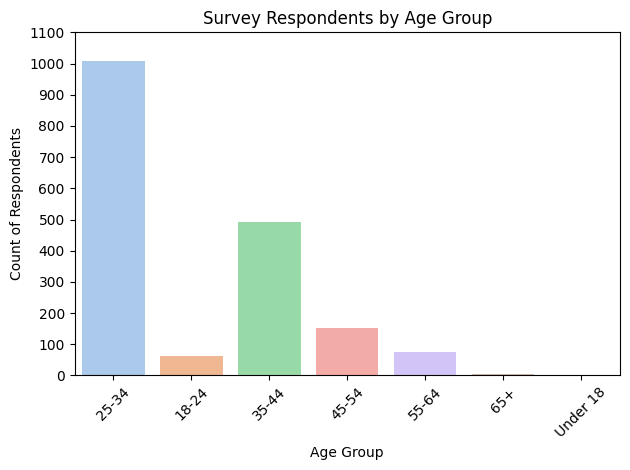

In [152]:
# visualing respondents by age group
sns.countplot(df, x="age",hue="age", palette="pastel", legend=False)
plt.title("Survey Respondents by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count of Respondents")
plt.yticks(
    ticks=np.arange(0, df['age'].value_counts().max() + 100, 100)
)
plt.xticks(rotation=45)
plt.tight_layout()

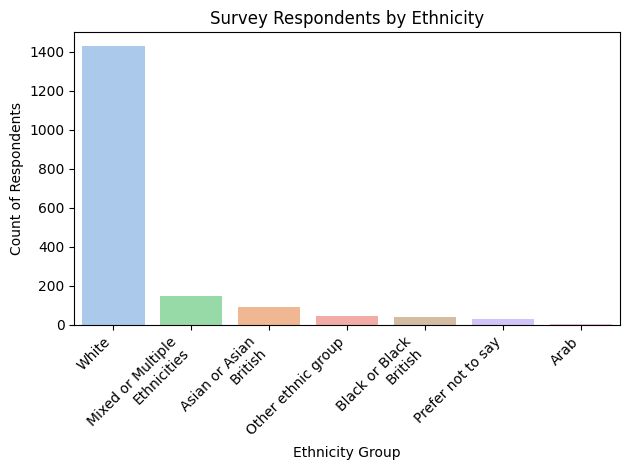

In [155]:
# visualising by ethnicity
# plt.figure(figsize=(10, 8))
sns.countplot(data=df, x="ethnicity", hue="ethnicity", palette='pastel', legend=False, order=df["ethnicity"].value_counts().index)
plt.title('Survey Respondents by Ethnicity')
plt.xlabel('Ethnicity Group')
plt.ylabel('Count of Respondents')
plt.xticks(
    ticks=plt.gca().get_xticks(),
    labels=wrap_labels(df["ethnicity"].value_counts().index), rotation=45, ha='right', fontsize=10
)
plt.tight_layout()

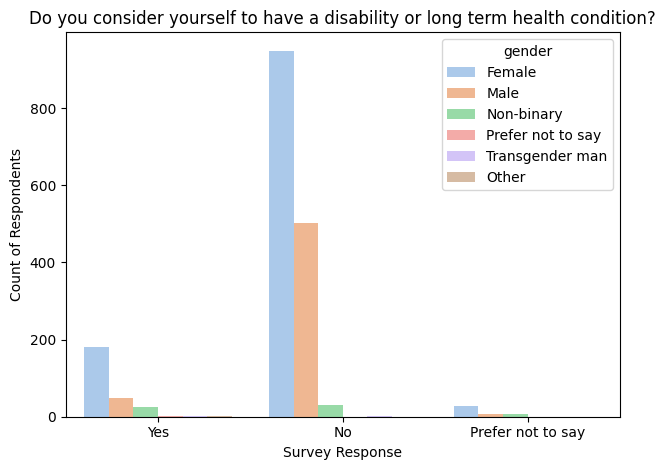

In [165]:
# visualising by disability
sns.countplot(data=df, x="disability_health_condition", hue="gender",palette='pastel')
plt.title('Do you consider yourself to have a disability or long term health condition?')
plt.xlabel('Survey Response')
plt.ylabel('Count of Respondents')
plt.xticks(rotation=0)
plt.tight_layout()

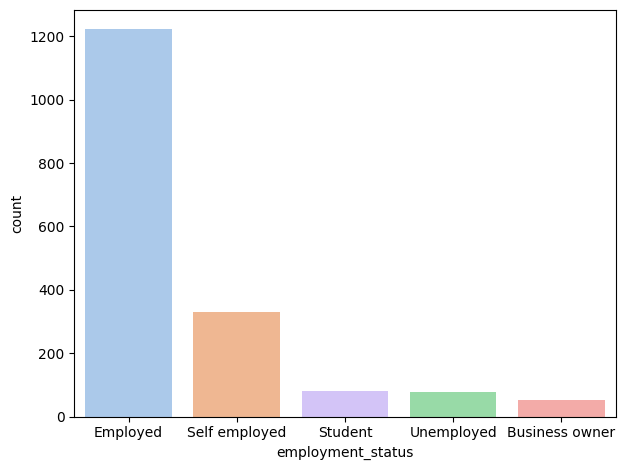

In [ ]:
# visualing respondents by top 5 employment statuses by count
top5_status = df['employment_status'].value_counts().head(5).index
sns.countplot(
    data=df[df['employment_status'].isin(top5_status)],
    x="employment_status",
    hue="employment_status",
    palette='pastel',
    legend=False,
    order=top5_status
)
plt.tight_layout()

In [94]:
exploded_counts = df['enjoyment_reasons'].explode().value_counts()
exploded_counts

enjoyment_reasons
Improved mood                                                                                                                                                                  152
Improved mood, Assists me with my mental health resilience                                                                                                                      67
Improved mood, Improved sense of belonging to the local community., Helped me connect with the outdoors                                                                         62
Improved mood, Helped me connect with the outdoors                                                                                                                              52
Improved mood, Improved sense of belonging to the local community.                                                                                                              52
                                                                                       

In [ ]:
# Frequency of sauna visits
sns.countplot(data=df, x="visit_frequency", hue="location_frequency", palette='pastel', order=df["visit_frequency"].value_counts().index)
plt.title('Frequency of Sauna Visits by Preferred Location')
plt.xlabel('Frequency of Visits')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

In [ ]:
# Frequency of sauna visits by Age Group
sns.countplot(data=df, x="visit_frequency", hue="age", palette='pastel', order=df["visit_frequency"].value_counts().index)
plt.title('Frequency of Sauna Visits by Age Group')
plt.xlabel('Frequency of Visits')
plt.ylabel('Count of Respondents')
plt.xticks(rotation=45)
plt.tight_layout()

In [ ]:

# Plot histogram
plt.figure(figsize=(14, 6))
sns.histplot(exploded_counts, bins=30, kde=False, color='blue', edgecolor='black')
plt.xlabel('Unique Enjoyment Reason Combinations')
plt.ylabel('Count')
plt.title('Histogram of All Enjoyment Reason Combinations')
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

# Rank-frequency data
ranks = np.arange(1, len(exploded_counts) + 1)
frequencies = exploded_counts.values

# Plot log-log
plt.figure(figsize=(10, 6))
plt.plot(ranks, frequencies, marker='o', linestyle='none', color='darkgreen')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Rank of Reason')
plt.ylabel('Frequency')
plt.title('Rank-Frequency Plot (Log-Log) of Enjoyment Reasons')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.tight_layout()
plt.show()


In [ ]:
# Exploring the long tail distribution of enjoyment reasons

value_counts = df['enjoyment_reasons'].explode().value_counts()
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(value_counts)+1), value_counts.values)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Rank')
plt.ylabel('Frequency (log scale)')
plt.title('Log-Log Plot of Enjoyment Reason Frequencies')
plt.show()


In [ ]:
# Exploring the top 10 reasons given for enjoying the community sauna
df['enjoyment_reasons'].value_counts().head(10)

In [ ]:
# Visualising the top 20 reasons for enjoying the community sauna, change "n" to adjust the number of reasons displayed

import textwrap

# Wrap long labels
def wrap_labels(label, width=40):
    return '\n'.join(textwrap.wrap(label, width=width))

# Prepare data for seaborn
top_n = 10
top_reasons = df['enjoyment_reasons'].explode().value_counts().head(top_n)
plot_data = top_reasons.reset_index()
plot_data.columns = ['Enjoyment Reason', 'Count']
plot_data['Enjoyment Reason'] = plot_data['Enjoyment Reason'].apply(wrap_labels)

# Create horizontal barplot
plt.figure(figsize=(10, 8))
sns.barplot(data=plot_data, y='Enjoyment Reason', x='Count', palette='viridis')

plt.title(f'Top {top_n} Enjoyment Reasons')
plt.xlabel('Count')
plt.ylabel('Enjoyment Reason')

plt.tight_layout()
plt.show()




In [ ]:
# Exploring joint plots for enjoyment reasons and belonging rating
sns.jointplot(data=df, x="enjoyment_reasons", y="Do you feel a sense of belonging or community when using the sauna?", kind="scatter", palette="pastel")


In [ ]:
# importing the one hot encoder from sklearn
from sklearn.preprocessing import OneHotEncoder

# creating encoder object
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Selecting relevant columns for one-hot encoding
df_subset = df[["visit_frequency", "physical_health_improvements", "mental_health_improvements"]]
# remove rows where visit_frequency is NaN
df_subset = df_subset.dropna(subset=["visit_frequency"])

# Converting 'visit_frequency' to categorical type for one-hot encoding
df_pandas_encoded = pd.get_dummies(df_subset, columns=["visit_frequency"])
# One-hot encoding the 'visit_frequency' column
onehotenc = encoder.fit_transform(df_subset[['visit_frequency']])
one_hot_df = pd.DataFrame(onehotenc, columns=encoder.get_feature_names_out(['visit_frequency']))

# add the other columns using join 
df_subset = df_subset.join(one_hot_df)
df_subset = df_subset.drop(columns=["visit_frequency"])
df_subset

In [ ]:
# create an array summing the visit frequency columns for data integrity

visit_frequency_columns = [col for col in df_subset.columns if col.startswith('visit_frequency_')]
visit_frequency_sum = df_subset[visit_frequency_columns].sum(axis=1)
df_subset['visit_frequency_sum'] = visit_frequency_sum
df_subset

In [ ]:
# Creating contingency tables for the chi-squared test
len(df_subset[(df_subset['visit_frequency_Rarely'] == 1) & (df_subset['physical_health_improvements'] == "Yes")])
          

In [ ]:
# Splitting the 'enjoyment_reasons' responses selection1,selection2,selection,3
# into something like this:
# ["selection1", "selection2", "selection3"] 
# Split the 'enjoyment_reasons' column into lists (handle NaN safely)
df['enjoyment_reasons'] = df['enjoyment_reasons'].apply(lambda x: [s.strip() for s in str(x).split(',')] if pd.notnull(x) else [])

# Count the number of options selected in each row
df['enjoyment_reasons_count'] = df['enjoyment_reasons'].apply(len)
df

### Statistical testing

Using the ch-sqaure test of independence

In [ ]:
# Create a contingency table of sauna visit frequency counts in df_subset
contingency_table = df_subset[[col for col in df_subset.columns if col.startswith('visit_frequency_')]].sum().to_frame(name='count')
contingency_table.index = contingency_table.index.str.replace('visit_frequency_', '')
contingency_table

In [ ]:
# Create a contingency table to show value counts for visit_frequency vs physical_health_improvements and mental_health_improvements
contingency_physical = pd.crosstab(
    df_subset[visit_frequency_columns].idxmax(axis=1).str.replace('visit_frequency_', ''),
    df_subset['physical_health_improvements']
)

contingency_mental = pd.crosstab(
    df_subset[visit_frequency_columns].idxmax(axis=1).str.replace('visit_frequency_', ''),
    df_subset['mental_health_improvements']
)

print("Contingency Table: Visit Frequency vs Physical Health Improvements")
display(contingency_physical)

print("\nContingency Table: Visit Frequency vs Mental Health Improvements")
display(contingency_mental)

In [ ]:
from scipy.stats import chi2_contingency

# Performing Chi-square test of independence
# between frequency of sauna visits and physical health improvements
contingency = pd.crosstab(
    df['visit_frequency'],
    df['physical_health_improvements']
)

chi2, p, dof, expected = chi2_contingency(contingency)

print("Chi-square statistic:", chi2)
print("Degrees of freedom:", dof)
print("P-value:", p)


In [ ]:
# Performing Chi-square test of independence
# between frequency of sauna visits and mental health improvements
contingency = pd.crosstab(
    df['visit_frequency'],
    df['mental_health_improvements']
)

chi2, p, dof, expected = chi2_contingency(contingency)

print("Chi-square statistic:", chi2)
print("Degrees of freedom:", dof)
print("P-value:", p)


### Paired t-test from intervention study - dumbbell plot and t-test

The instrument of measure used in the resesearch is inversely coded where wellbeing ratings are on the scale of:

- 0 = "as good as it can be" and 
- 6 = "as bad as it can be"

In [ ]:
# Load the intervention study dataset
df_intervention = pd.read_csv("Embedded Intervention Study Before and After(Wellbeing scores)(final).csv")
# Clean column names (remove extra spaces)
df_intervention.columns = df_intervention.columns.str.strip()
# Drop rows where 'Before wellbeing score' is NaN
df_intervention = df_intervention.dropna(subset=['Before wellbeing score'])
# Drop rows where 'After wellbeing score' is NaN
df_intervention = df_intervention.dropna(subset=['After wellbeing score'])
# Sort by 'Before wellbeing score' for better visual clarity
df_intervention = df_intervention.sort_values("Before wellbeing score", ascending=True)
# Check the first few rows of the dataset
df_intervention.head()
print ("Shape: ", df_intervention.shape)



In [ ]:
df_intervention

In [ ]:
df_sorted = df_intervention.sort_values("Before wellbeing score", ascending=False).reset_index(drop=True)
df_sorted['Index'] = df_sorted.index + 1

In [ ]:
plt.figure(figsize=(12, 6))

# Plot colored lines based on improvement (green), decline (red), or no change (gray)
for _, row in df_sorted.iterrows():
    change = row['After wellbeing score'] - row['Before wellbeing score']
    if change < 0:
        color = 'green'  # Score decreased = improvement
    elif change > 0:
        color = 'red'    # Score increased = decline
    else:
        color = 'gray'   # No change
    
    plt.plot(
        [row['Index']] * 2,
        [row['Before wellbeing score'], row['After wellbeing score']],
        color=color, linewidth=2
    )


#Add black dots for before and after
plt.scatter(df_sorted['Index'], df_sorted['Before wellbeing score'], 
            color='black', label='Before')
plt.scatter(df_sorted['Index'], df_sorted['After wellbeing score'], 
            color='blue', label='After')

# Annotate participants with no change
for _, row in df_sorted.iterrows():
    if row['Before wellbeing score'] == row['After wellbeing score']:
        plt.text(
            row['Index'] + 0.1,  # slightly offset on x-axis
            row['Before wellbeing score'],  # same y since no change
            'No change',
            fontsize=6,
            color='red'
        )

# Customize axises and labels
plt.ylabel('Wellbeing Score, where 0 is "worst" and 6 is "best"')
plt.xlabel('Participant Number')
plt.xticks(df_sorted['Index'], df_sorted['Participant number'].astype(int), rotation=45)
plt.title('Change in Wellbeing Scores (Improvement = Upward)')
plt.legend()
plt.tight_layout()
plt.ylim(bottom=0)  # Optional: start Y-axis at 0
plt.yticks([0, 1, 2, 3, 4, 5, 6], [
    'Best (0)', '1', '2', '3', '4', '5', 'Worst (6)'
])
plt.gca().invert_yaxis()
plt.show()



In [ ]:
# Calculating the mean and standard deviation of the wellbeing scores
mean_before = df_intervention['Before wellbeing score'].mean()
mean_after = df_intervention['After wellbeing score'].mean()
std_before = df_intervention['Before wellbeing score'].std()
std_after = df_intervention['After wellbeing score'].std()
print(f"Mean Before: {mean_before:.2f}, Std Before: {std_before:.2f}")
print(f"Mean After: {mean_after:.2f}, Std After: {std_after:.2f}")
# Performing paired t-test
from scipy.stats import ttest_rel
t_stat, p_value = ttest_rel(
    df_intervention['Before wellbeing score'], 
    df_intervention['After wellbeing score']
)
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")
# Interpreting the results
if p_value < 0.05:
    print("There is a statistically significant difference in wellbeing scores before and after the intervention.")
else:
    print("There is no statistically significant difference in wellbeing scores before and after the intervention.")
# Visualizing the distribution of wellbeing scores before and after the intervention
plt.figure(figsize=(12, 6))
sns.histplot(df_intervention['Before wellbeing score'], kde=True, color='blue', label='Before', stat='density', bins=10)
sns.histplot(df_intervention['After wellbeing score'], kde=True, color='orange', label='After', stat='density', bins=10)
plt.axvline(mean_before, color='blue', linestyle='--', label='Mean Before')
plt.axvline(mean_after, color='orange', linestyle='--', label='Mean After')
plt.title('Distribution of Wellbeing Scores Before and After Intervention')
plt.xlabel('Wellbeing Score')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

### Regression analysis(?)

In [ ]:
# Preparing columns for binary regression analysis
# Map 'Yes' to 1, 'No' to 0, leave others (e.g., 'Not sure', NaN) as NaN
binary_improvements = pd.DataFrame()
binary_improvements['physical_health_improvements'] = df['physical_health_improvements'].map({'Yes': 1, 'No': 0})
binary_improvements['mental_health_improvements'] = df['mental_health_improvements'].map({'Yes': 1, 'No': 0})
binary_improvements.dropna(inplace=True)
binary_improvements.shape

In [ ]:
# import statsmodels for regression analysis
import statsmodels.api as sm
# Define the independent variables (X) and dependent variable (y)
X = df_subset.drop(columns=['physical_health_improvements', 'mental_health_improvements'])

### Topic modelling 

In [ ]:
%pip install bertopic
%pip install tf-keras
%pip install plotly

In [ ]:
print(len(df['importance_reason'].dropna()))
len(df['importance_reason'])

In [ ]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
vectoriser_model = CountVectorizer(stop_words="english")



topic_model = BERTopic(vectorizer_model=vectoriser_model)
topics, probs = topic_model.fit_transform(df['importance_reason'].dropna().to_list())

In [ ]:
topic_model.get_topic(0)  # Get the most frequent topic
      

In [ ]:
# Install wordcloud
%pip install wordcloud
from wordcloud import WordCloud

In [ ]:
# Create a word cloud for the most popular topic
most_frequent_topic = topic_model.get_topic(0) # Change the number from 0-2 to view a different topic
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(most_frequent_topic))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Most Popular Topic")
plt.show()

In [ ]:
topic_model.visualize_heatmap()

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

# Get topic embeddings from BERTopic
topic_embeddings = topic_model.topic_embeddings_

# Remove outlier topic (-1) if present
valid_topics = [i for i in range(len(topic_embeddings)) if i != -1]
embeddings = np.array([topic_embeddings[i] for i in valid_topics])

# Cluster topics using KMeans (set k <= number of valid topics)
k = min(5, len(valid_topics))
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
labels = kmeans.fit_predict(embeddings)

# Reduce dimensions for visualization
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)

# Plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=labels, cmap='tab10', s=100)
for i, topic_num in enumerate(valid_topics):
    plt.annotate(str(topic_num), (embeddings_2d[i, 0], embeddings_2d[i, 1]), fontsize=9)
plt.title("BERT Topic Embeddings clustered by KMeans")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(scatter, label='Cluster')
plt.tight_layout()
plt.show()